In [ ]:
%pip install gekko
%matplotlib inline
from gekko import GEKKO
import math
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 第一題

variable: t   
constraint: >=0 and <= a large number  
objective: maximize((4*(1.0-0.75**t))+(1/(1+t))

In [ ]:
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver
# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 5000', \
           # minlp iterations with integer solution
           'minlp_max_iter_with_int_sol 5000', \
           # treat minlp as nlp
           'minlp_as_nlp 0', \
           # nlp sub-problem max iterations
           'nlp_maximum_iterations 50', \
           # 1 = depth first, 2 = breadth first
           'minlp_branch_method 1', \
           # maximum deviation from whole number
           'minlp_integer_tol 0.05', \
           # covergence tolerance
           'minlp_gap_tol 0.001']

In [ ]:
t = m.Var(value=0, lb=0, ub=999, integer=False)

In [ ]:
m.Obj(-1*((4*(1.0-0.75**t))+(1/(1+t))))

In [ ]:
m.solve(disp=True) # Solve

print('Results')
print('t: ' + str(t.value))
print('Objective: ' + str(m.options.objfcnval))

apm 34.125.60.202_gk_model77 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            1
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              1
 Number of total equations: -            0
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              1
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0 -1.03876E+00  0.00000E+00
    1 -1.15810E+00  0.00000E+00
    2 -3.74349E+00  0.00000E+00
 

Answer Q1:  
t is 22.408826946 year  
at that time company can get total 4.0363754207 million

# 第二題

(a) used by GEKKO  

variables: 4 variables represent the proportion of the asset allocation to each company.   
(x1: XON, x2: MSFT, x3: ORCL, x4: S&P500)

constraints:   
1. x1+x2+x3+x4 == 1 (because of proportion, sum of total asset allocation proportion need to be 1)
2. x1 * 0.1467+x2 * 0.3320+x3 * 0.5936+x4 * 0.1191 == 0.3 (Expected annual return is 30%)

objective:  
Minimize((  
&emsp;&emsp;&emsp;      (x1 * * 2) * (0.1217 * * 2)+  
&emsp;&emsp;&emsp;      (x2 * * 2) * (0.2447 * * 2)+  
&emsp;&emsp;&emsp;      (x3 * * 2) * (0.3772 * * 2)+  
&emsp;&emsp;&emsp;      (x4 * * 2) + (0.0866 * * 2)+  
&emsp;&emsp;&emsp;      (2 * x1 * x2 * 0.1217 * 0.2447* 0.158)+  
&emsp;&emsp;&emsp;      (2 * x1 * x3 * 0.1217 * 0.3772 * 0.078)+  
&emsp;&emsp;&emsp;      (2 * x1 * x4 * 0.1217 * 0.0866 * 0.579)+  
&emsp;&emsp;&emsp;      (2 * x2 * x3 * 0.2446 * 0.3772 * 0.241)+  
&emsp;&emsp;&emsp;      (2 * x2 * x4 * 0.2447 * 0.0866 * 0.302)+  
&emsp;&emsp;&emsp;      (2 * x3 * x4 * 0.3772 * 0.0866 * 0.282)) * * 1/2)  
(Minimize standard deviation of manager's portfolio)  



In [ ]:
m2 = GEKKO() # Initialize gekko
m2.options.SOLVER=1  # APOPT is an MINLP solver
# optional solver settings with APOPT
m2.solver_options = ['minlp_maximum_iterations 5000', \
           # minlp iterations with integer solution
           'minlp_max_iter_with_int_sol 5000', \
           # treat minlp as nlp
           'minlp_as_nlp 0', \
           # nlp sub-problem max iterations
           'nlp_maximum_iterations 50', \
           # 1 = depth first, 2 = breadth first
           'minlp_branch_method 1', \
           # maximum deviation from whole number
           'minlp_integer_tol 0.05', \
           # covergence tolerance
           'minlp_gap_tol 0.001']

In [ ]:
x1 = m2.Var(value=0, lb=0, ub=1, integer=False)

In [ ]:
x2 = m2.Var(value=0, lb=0, ub=1, integer=False)

In [ ]:
x3 = m2.Var(value=0, lb=0, ub=1, integer=False)

In [ ]:
x4 = m2.Var(value=0, lb=0, ub=1, integer=False)

In [ ]:
m2.Equation(x1+x2+x3+x4 == 1)

In [ ]:
m2.Equation((x1*0.1467+x2*0.3320+x3*0.5936+x4*0.1191) == 0.3)

In [ ]:
m2.Obj(((x1**2)*(0.1217**2)+
      (x2**2)*(0.2447**2)+
      (x3**2)*(0.3772**2)+
      (x4**2)+(0.0866**2)+
      (2*x1*x2*0.1217*0.2447*0.158)+
      (2*x1*x3*0.1217*0.3772*0.078)+
      (2*x1*x4*0.1217*0.0866*0.579)+
      (2*x2*x3*0.2446*0.3772*0.241)+
      (2*x2*x4*0.2447*0.0866*0.302)+
      (2*x3*x4*0.3772*0.0866*0.282))**1/2)

In [ ]:
m2.solve(disp=True) # Solve

print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('x3: ' + str(x3.value))
print('x4: ' + str(x4.value))
print('Objective: ' + str(m2.options.objfcnval))

apm 34.125.60.202_gk_model78 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              4
 Number of total equations: -            2
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              2
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.45572E-02  1.00000E+00
    1  1.40774E-02  0.00000E+00
    2  1.39984E-02  0.00000E+00
 

Answer Q2-a by GEKKO:  
x1: [0.50896577388] &emsp;(for XON, company should allocate 50% here).  
x2: [0.25156920541] &emsp;(for MSFT, company should allocate 25% here).    
x3: [0.23876387947] &emsp;(for ORCL, company should allocate 23% here).    
x4: [0.00070114124006]  &emsp;(for S&P500, company should allocate 0.07% here)   

Objective: 0.013996707326  
The minimized standard deviation is 0.013996707326

(a) by scipy

In [ ]:
def objective(g):
    return  np.sqrt(((g[0]**2)*(0.1217**2)+
      (g[1]**2)*(0.2447**2)+
      (g[2]**2)*(0.3772**2)+
      (g[3]**2)+(0.0866**2)+
      (2*g[0]*g[1]*0.1217*0.2447*0.158)+
      (2*g[0]*g[2]*0.1217*0.3772*0.078)+
      (2*g[0]*g[3]*0.1217*0.0866*0.579)+
      (2*g[1]*g[2]*0.2446*0.3772*0.241)+
      (2*g[1]*g[3]*0.2447*0.0866*0.302)+
      (2*g[2]*g[3]*0.3772*0.0866*0.282)))#Scipy only has minimize function
def constr1(g):
    return g[0] + g[1] + g[2] + g[3]
def constr2(g):
    return (g[0]*0.1467+g[1]*0.3320+g[2]*0.5936+g[3]*0.1191)

x0 = np.array([0, 0, 0, 0]) ## initial value
cons1 = opt.NonlinearConstraint(constr1, ub=1, lb=0)
cons2 = opt.NonlinearConstraint(constr2, ub=0.3, lb=0.3)
res = opt.minimize(objective, x0,constraints=[cons1, cons2])

In [ ]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.16731240019919202
       x: [ 5.094e-01  2.510e-01  2.390e-01  6.274e-04]
     nit: 8
     jac: [ 5.729e-02  1.360e-01  2.475e-01  4.509e-02]
    nfev: 41
    njev: 8

Answer Q2-by scipy  
x1: 0.5094  &emsp;(for XON, company should allocate 50% here).  
x2: 0.2508  &emsp;(for MSFT, company should allocate 25% here).  
x3: 0.2391  &emsp;(for ORCL, company should allocate 23% here).  
x4: 0.0007212  &emsp;(for S&P500, company should allocate 0.07% here).  

objective: 0.16731246080194218  
The minimized standard deviation is 0.16731246080194218

Answer from scipy is very similar to that from GEKKO

## (b) by GEKKO

variables: 4 variables represent the proportion of the asset allocation to each company.   
(x1: XON, x2: MSFT, x3: ORCL, x4: S&P500)

constraints:   
1. x1+x2+x3+x4 == 1 (because of proportion, sum of total asset allocation proportion need to be 1)

2. &emsp;&emsp;&emsp;      ((x1 * * 2) * (0.1217 * * 2)+  
&emsp;&emsp;&emsp;      (x2 * * 2) * (0.2447 * * 2)+  
&emsp;&emsp;&emsp;      (x3 * * 2) * (0.3772 * * 2)+  
&emsp;&emsp;&emsp;      (x4 * * 2) + (0.0866 * * 2)+  
&emsp;&emsp;&emsp;      (2 * x1 * x2 * 0.1217 * 0.2447* 0.158)+  
&emsp;&emsp;&emsp;      (2 * x1 * x3 * 0.1217 * 0.3772 * 0.078)+  
&emsp;&emsp;&emsp;      (2 * x1 * x4 * 0.1217 * 0.0866 * 0.579)+  
&emsp;&emsp;&emsp;      (2 * x2 * x3 * 0.2446 * 0.3772 * 0.241)+  
&emsp;&emsp;&emsp;      (2 * x2 * x4 * 0.2447 * 0.0866 * 0.302)+  
&emsp;&emsp;&emsp;      (2 * x3 * x4 * 0.3772 * 0.0866 * 0.282)) * * 1/2 == 0.1   
(Standard deviation of portfolio is 10%)

objective:  
Maximize(x1 * 0.1467+x2 * 0.3320+x3 * 0.5936+x4 * 0.1191)  
(Maximize expected return of manager's portfolio)  



In [ ]:
m3 = GEKKO() # Initialize gekko
m3.options.SOLVER=1  # APOPT is an MINLP solver
# optional solver settings with APOPT
m3.solver_options = ['minlp_maximum_iterations 5000', \
           # minlp iterations with integer solution
           'minlp_max_iter_with_int_sol 5000', \
           # treat minlp as nlp
           'minlp_as_nlp 0', \
           # nlp sub-problem max iterations
           'nlp_maximum_iterations 50', \
           # 1 = depth first, 2 = breadth first
           'minlp_branch_method 1', \
           # maximum deviation from whole number
           'minlp_integer_tol 0.05', \
           # covergence tolerance
           'minlp_gap_tol 0.001']

In [ ]:
x1 = m3.Var(value=0, lb=0, ub=1, integer=False)

In [ ]:
x2 = m3.Var(value=0, lb=0, ub=1, integer=False)

In [ ]:
x3 = m3.Var(value=0, lb=0, ub=1, integer=False)

In [ ]:
x4 = m3.Var(value=0, lb=0, ub=1, integer=False)

In [ ]:
m3.Equation((x1+x2+x3+x4) < 1)

In [ ]:
m3.Equation(((x1**2)*(0.1217**2)+
      (x2**2)*(0.2447**2)+
      (x3**2)*(0.3772**2)+
      (x4**2)+(0.0866**2)+
      (2*x1*x2*0.1217*0.2447*0.158)+
      (2*x1*x3*0.1217*0.3772*0.078)+
      (2*x1*x4*0.1217*0.0866*0.579)+
      (2*x2*x3*0.2446*0.3772*0.241)+
      (2*x2*x4*0.2447*0.0866*0.302)+
      (2*x3*x4*0.3772*0.0866*0.282))**1/2 == 0.1)

In [ ]:
m3.Maximize((x1*0.1467+x2*0.3320+x3*0.5936+x4*0.1191))

In [ ]:
try:
  m3.solve(disp=True) # Solve
except:
  print('no solution')
print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('x3: ' + str(x3.value))
print('x3: ' + str(x4.value))
print('Objective: ' + str(m3.options.objfcnval))

apm 34.125.60.202_gk_model79 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              5
 Number of total equations: -            2
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              2
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0 -4.41282E-01  1.00000E+00
    1 -5.93600E-01  0.00000E+00
    2 -5.93600E-01  0.00000E+00
 

Answer: Q2-b by GEKKO

GEKKO can't find answer because the standard deviation of portfolio never become 10%

I have proved this by plotting efficient frontier in question 2-c

(b) by scipy

In [ ]:
def objective(g):
    return -((g[0]*0.1467+g[1]*0.3320+g[2]*0.5936+g[3]*0.1191)) #Scipy only has minimize function
def constr1(g):
    return g[0] + g[1] + g[2] + g[3]
def constr2(g):
    return np.sqrt(((g[0]**2)*(0.1217**2)+
      (g[1]**2)*(0.2447**2)+
      (g[2]**2)*(0.3772**2)+
      (g[3]**2)+(0.0866**2)+
      (2*g[0]*g[1]*0.1217*0.2447*0.158)+
      (2*g[0]*g[2]*0.1217*0.3772*0.078)+
      (2*g[0]*g[3]*0.1217*0.0866*0.579)+
      (2*g[1]*g[2]*0.2446*0.3772*0.241)+
      (2*g[1]*g[3]*0.2447*0.0866*0.302)+
      (2*g[2]*g[3]*0.3772*0.0866*0.282)))

In [ ]:
x0 = np.array([0, 0, 0, 0]) ## initial value
cons1 = opt.NonlinearConstraint(constr1, ub=1, lb=1)
cons2 = opt.NonlinearConstraint(constr2, ub=0.1, lb=0.1)
res = opt.minimize(objective, x0,constraints=[cons1, cons2])

In [ ]:
res

 message: Iteration limit reached
 success: False
  status: 9
     fun: nan
       x: [       nan        nan        nan        nan]
     nit: 100
     jac: [       nan        nan        nan        nan]
    nfev: 1202
    njev: 100

Answer: Q2-b by scipy

scipy can't find answer because the standard deviation of portfolio never become 10%

I have proved this by plotting efficient frontier in question 2-c

## (C) by GEKKO

In [ ]:
def calc(rp) -> list:
  m4 = GEKKO() # Initialize gekko
  m4.options.SOLVER=1  # APOPT is an MINLP solver
  # optional solver settings with APOPT
  m4.solver_options = ['minlp_maximum_iterations 5000', \
           # minlp iterations with integer solution
           'minlp_max_iter_with_int_sol 5000', \
           # treat minlp as nlp
           'minlp_as_nlp 0', \
           # nlp sub-problem max iterations
           'nlp_maximum_iterations 50', \
           # 1 = depth first, 2 = breadth first
           'minlp_branch_method 1', \
           # maximum deviation from whole number
           'minlp_integer_tol 0.05', \
           # covergence tolerance
           'minlp_gap_tol 0.001']
  x1 = m4.Var(value=0, lb=0, ub=1, integer=False)
  x2 = m4.Var(value=0, lb=0, ub=1, integer=False)
  x3 = m4.Var(value=0, lb=0, ub=1, integer=False)
  x4 = m4.Var(value=0, lb=0, ub=1, integer=False)
  m4.Equation((x1+x2+x3+x4) == 1)
  m4.Equation((x1*0.1467+x2*0.3320+x3*0.5936+x4*0.1191) == rp)
  m4.Obj(((x1**2)*(0.1217**2)+
        (x2**2)*(0.2447**2)+
        (x3**2)*(0.3772**2)+
        (x4**2)+(0.0866**2)+
        (2*x1*x2*0.1217*0.2447*0.158)+
        (2*x1*x3*0.1217*0.3772*0.078)+
        (2*x1*x4*0.1217*0.0866*0.579)+
        (2*x2*x3*0.2446*0.3772*0.241)+
        (2*x2*x4*0.2447*0.0866*0.302)+
        (2*x3*x4*0.3772*0.0866*0.282))**1/2)
  m4.solve(disp=False) # Solve
  return [rp, m4.options.objfcnval, x1.value[0], x2.value[0], x3.value[0], x4.value[0]]

In [ ]:
answer =[]
for i in range(15,50):
  answer.append(calc(i/100))
npans = np.asarray(answer)
npans = npans[:, :2]

In [ ]:
npans[0,0]

0.15

In [ ]:
npans.shape

(35, 2)

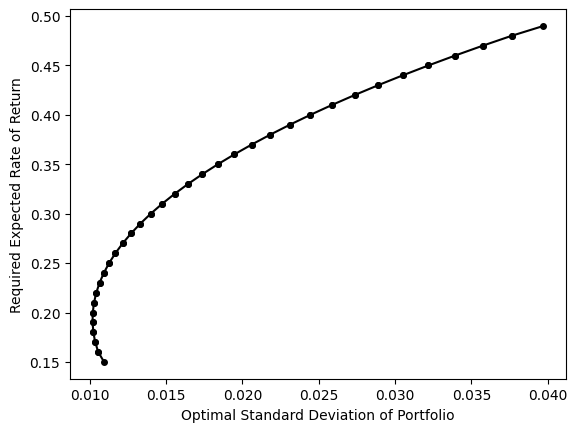

In [ ]:
for i in range(0,npans.shape[0]-1):
  plt.plot([npans[i,1],npans[i+1,1]], [npans[i,0],npans[i+1,0]], 'ko-', markersize=4)
plt.ylabel('Required Expected Rate of Return')
plt.xlabel('Optimal Standard Deviation of Portfolio')
plt.show()

Answer Q3-GEKKO

as you can see the standard deviation of portfolio never down to 0.1, so the question 2-b is no solution.

In [ ]:
df = pd.DataFrame(answer, columns=['Required Expected annual Return', 'Optimal Standard Deviation', 'Optiaml allocation-XON', 'Optimal allocation-MSFT', 'Optimal allocation-ORCL', 'Optimal allocation-S&P500'])

In [ ]:
df

,Required Expected annual Return,Optimal Standard Deviation,Optiaml allocation-XON,Optimal allocation-MSFT,Optimal allocation-ORCL,Optimal allocation-S&P500
0,0.15,0.010937,0.970948,0.019266,0.000000,0.009785
1,0.16,0.010560,0.918221,0.073072,0.000000,0.008707
2,0.17,0.010358,0.877030,0.106719,0.008374,0.007877
3,0.18,0.010239,0.848717,0.117861,0.026096,0.007325
4,0.19,0.010187,0.820404,0.129004,0.043819,0.006773
5,0.20,0.010201,0.792092,0.140146,0.061541,0.006221
6,0.21,0.010281,0.763779,0.151288,0.079263,0.005669
7,0.22,0.010428,0.735467,0.162431,0.096986,0.005117
8,0.23,0.010642,0.707154,0.173573,0.114708,0.004565
9,0.24,0.010922,0.678841,0.184715,0.132430,0.004013


In [ ]:
def objective(g):
    return  np.sqrt(((g[0]**2)*(0.1217**2)+
      (g[1]**2)*(0.2447**2)+
      (g[2]**2)*(0.3772**2)+
      (g[3]**2)+(0.0866**2)+
      (2*g[0]*g[1]*0.1217*0.2447*0.158)+
      (2*g[0]*g[2]*0.1217*0.3772*0.078)+
      (2*g[0]*g[3]*0.1217*0.0866*0.579)+
      (2*g[1]*g[2]*0.2446*0.3772*0.241)+
      (2*g[1]*g[3]*0.2447*0.0866*0.302)+
      (2*g[2]*g[3]*0.3772*0.0866*0.282)))#Scipy only has minimize function
def constr1(g):
    return g[0] + g[1] + g[2] + g[3]
def constr2(g):
    return (g[0]*0.1467+g[1]*0.3320+g[2]*0.5936+g[3]*0.1191)

def scipy_calc(rp):
  x0 = np.array([0, 0, 0, 0]) ## initial value
  cons1 = opt.NonlinearConstraint(constr1, ub=1, lb=1)
  cons2 = opt.NonlinearConstraint(constr2, ub=rp, lb=rp)
  res = opt.minimize(objective, x0,constraints=[cons1, cons2])
  return [rp, res.fun, res.x[0], res.x[1], res.x[2], res.x[3]]

In [ ]:
answer =[]
for i in range(15,50):
  answer.append(scipy_calc(i/100))
npans = np.asarray(answer)
npans = npans[:, :2]

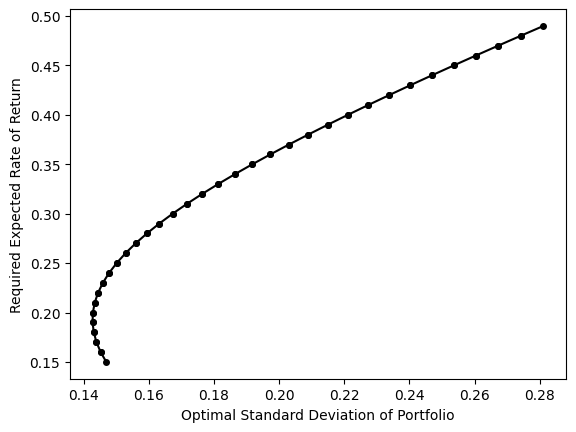

In [ ]:
for i in range(0,npans.shape[0]-1):
  plt.plot([npans[i,1],npans[i+1,1]], [npans[i,0],npans[i+1,0]], 'ko-', markersize=4)
plt.ylabel('Required Expected Rate of Return')
plt.xlabel('Optimal Standard Deviation of Portfolio')
plt.show()

Answer Q3-Scipy

as you can see the standard deviation of portfolio never down to 0.1, so the question 2-b is no solution.

In [ ]:
df = pd.DataFrame(answer, columns=['Required Expected annual Return', 'Optimal Standard Deviation', 'Optiaml allocation-XON', 'Optimal allocation-MSFT', 'Optimal allocation-ORCL', 'Optimal allocation-S&P500'])

In [ ]:
df

,Required Expected annual Return,Optimal Standard Deviation,Optiaml allocation-XON,Optimal allocation-MSFT,Optimal allocation-ORCL,Optimal allocation-S&P500
0,0.15,0.146932,0.933362,0.084862,-0.027245,0.009022
1,0.16,0.145209,0.905101,0.095934,-0.009495,0.008459
2,0.17,0.143928,0.876861,0.107017,0.008250,0.007872
3,0.18,0.143100,0.848614,0.118094,0.025998,0.007294
4,0.19,0.142734,0.820328,0.129131,0.043766,0.006775
5,0.20,0.142833,0.792039,0.140199,0.061520,0.006242
6,0.21,0.143396,0.763756,0.151317,0.079252,0.005675
7,0.22,0.144418,0.735466,0.162280,0.097053,0.005201
8,0.23,0.145889,0.707191,0.173314,0.114822,0.004674
9,0.24,0.147795,0.678873,0.184616,0.132473,0.004038
